In [3]:
import cv2
import os
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [7]:
# Step 1: Set up project structure
parent_folder = '/Users/rishiraj/Documents/Dataloader-train-test-65-35'
train_folder = os.path.join(parent_folder, 'Train_Set/')
test_folder = os.path.join(parent_folder, 'Test_Set/')

classes = ['Hemorrhage', 'Infarct', 'Normal']

In [8]:
def extract_hog_features(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Resize the image to a fixed size (optional)
    resized = cv2.resize(gray, (64, 128))
    # Calculate the HoG features
    hog = cv2.HOGDescriptor()
    features = hog.compute(resized)
    return features.flatten()

In [9]:
train_data = []
train_labels = []

for class_index, class_name in enumerate(classes):
    class_folder = train_folder + class_name + '/'
    for image_name in os.listdir(class_folder):
        image_path = class_folder + image_name
        image = cv2.imread(image_path)
        if image is not None:
            features = extract_hog_features(image)
            train_data.append(features)
            train_labels.append(class_index)

train_data = np.array(train_data)
train_labels = np.array(train_labels)

In [10]:
svm_model = SVC()
svm_model.fit(train_data, train_labels)

SVC()

In [11]:
test_data = []
test_labels = []

for class_index, class_name in enumerate(classes):
    class_folder = test_folder + class_name + '/'
    for image_name in os.listdir(class_folder):
        image_path = class_folder + image_name
        image = cv2.imread(image_path)
        if image is not None:
            features = extract_hog_features(image)
            test_data.append(features)
            test_labels.append(class_index)

test_data = np.array(test_data)
test_labels = np.array(test_labels)

In [12]:
y_pred_test = svm_model.predict(test_data)
accuracy_test = accuracy_score(test_labels, y_pred_test)
print("Test Accuracy:", accuracy_test)

Test Accuracy: 0.7320055904961565


In [13]:
y_pred_train = svm_model.predict(train_data)
accuracy_train = accuracy_score(train_labels, y_pred_train)
print("Train Accuracy:", accuracy_train)

Train Accuracy: 0.9449060693641619


In [14]:
from sklearn.metrics import classification_report, confusion_matrix

# Print the classification report
print("Classification Report:")
print(classification_report(test_labels, y_pred_test, target_names=classes))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(test_labels, y_pred_test))

Classification Report:
              precision    recall  f1-score   support

  Hemorrhage       0.51      0.33      0.40       422
     Infarct       0.60      0.24      0.34       433
      Normal       0.77      0.92      0.84      2007

    accuracy                           0.73      2862
   macro avg       0.62      0.50      0.53      2862
weighted avg       0.70      0.73      0.70      2862

Confusion Matrix:
[[ 138   24  260]
 [  28  103  302]
 [ 107   46 1854]]


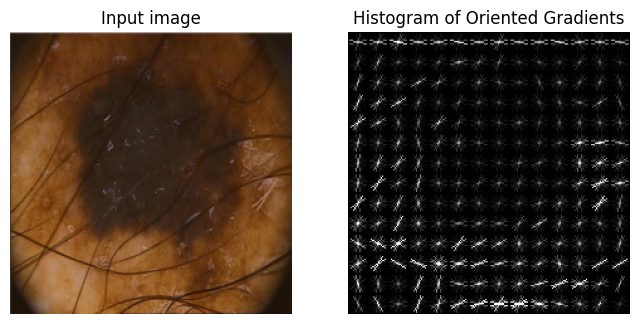

In [8]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure
from skimage.io import imread


image = imread('PH2_melanoma_IMD411.png')

fd, hog_image = hog(
    image,
    orientations=8,
    pixels_per_cell=(16, 16),
    cells_per_block=(1, 1),
    visualize=True,
    channel_axis=-1,
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()